In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import warnings
warnings.filterwarnings("ignore")



In [54]:
data = pd.read_csv('apple.csv')

In [55]:
data

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [56]:
data = data[['Date', ' Close/Last']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [57]:
data.columns = ['Close']

In [58]:
# Remove the dollar sign ('$') and convert to float
data['Close'] = data['Close'].str.replace('$', '').astype(float)

In [59]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [62]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        labels.append(data[i+sequence_length, 0])  # Predicting 'Close' price
    return np.array(sequences), np.array(labels)

sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


### Model

In [63]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(10))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [64]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 50, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,346 (204.48 KB)

 Trainable params: 52,346 (204.48 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0176 - val_loss: 4.5568e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0017 - val_loss: 3.0803e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011 - val_loss: 2.0173e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - val_loss: 6.9047e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0010 - val_loss: 6.5929e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.4165e-04 - val_loss: 7.1019e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.5801e-04 - val_loss: 5.5471e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.2169e-04 - val_loss: 6.0101e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.0926e-04 - val_loss: 8.9120e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.9630e-04 - val_loss: 9.2499e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.1887e-04 - val_loss: 1.6075

### Predictions

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


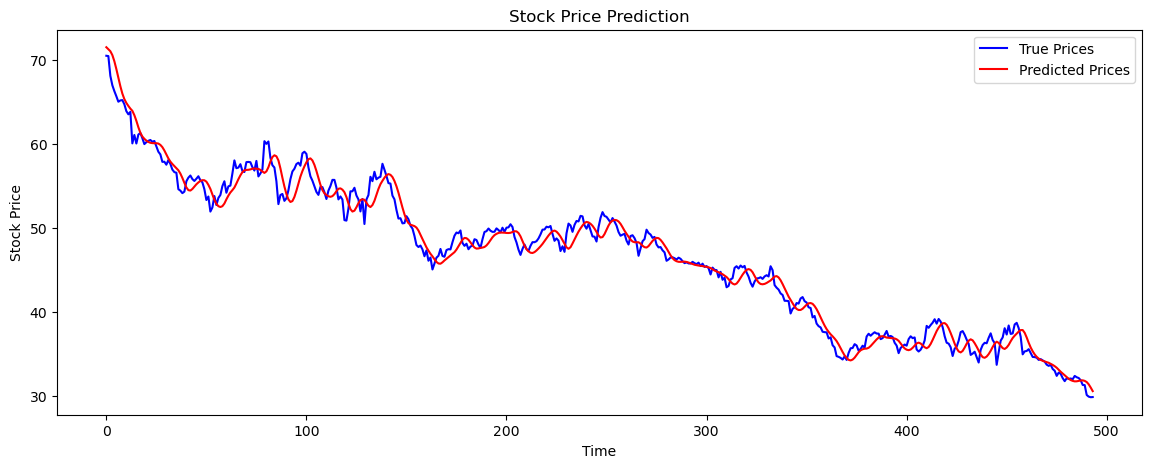

In [67]:
# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse scaling for the true test labels
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(true_prices, color='blue', label='True Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [70]:
mse = mean_squared_error(true_prices, predictions)
mae = mean_absolute_error(true_prices, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(true_prices, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²) Score: {r2}')


Mean Squared Error (MSE): 1.9251715913139378
Mean Absolute Error (MAE): 1.1027774760999183
Root Mean Squared Error (RMSE): 1.3875055283904052
R-squared (R²) Score: 0.974077379155406
